# NLP - Customer Service  Analysis 

# Appendix:
- Click on the links:
* <a href= #BusinessProblem> Business Problem</a>
* <a href= #Import> Imports Libraries</a>
* <a href= #ReadData> Read Data</a>
* <a href= #Data_Cleaning_and_Aggregation > Data Cleaning and Aggregation</a>
* <a href = #Vectorization>Vectorization </a> 
* <a href= #CountVectorization>Count Vectorization </a>
* <a href= #CountVectorizationUsing(1,2)Grams> Count Vectorization Using (1, 2) Grams </a>
* <a href= #TfidfVectorizerUsing(1,2)Grams> Tfidf Vectorizer Using (1, 2) Grams </a>
* <a href= #Topicmodeling> Topic Modeling </a>
* <a href= #NMF> NMF </a>
* <a href = #NMFandCountVectorization> NMF and Count Vectorization </a>
* <a href = #NMFandTfidfVectorizer> NMF and Tfidf Vectorizer </a>
* <a href = #LDA> LDA </a> 
* <a href = #Viewthedominanttopicprobabilityineachdocument > View The Dominant Topic Probability in Each Document </a>
* <a href= #wordcloud> Word Cloud </a>

# <a name= 'BusinessProblem'>Business Problem </a>

Analysis of most common customer service challenges encountered by telecummunication company through Natural language processing, and unsupervised machine learning algorithm.

# <a name= 'Import'>Imports Libraries </a>

In [3]:
from nltk.tokenize import word_tokenize
from sklearn.decomposition import NMF
import re
import string
from nltk.util import ngrams
from nltk.stem.lancaster import LancasterStemmer
import nltk 
import pandas as pd
import numpy as np
from nltk.stem import PorterStemmer
import csv
from ar_wordcloud import ArabicWordCloud
from wordcloud import WordCloud ,  ImageColorGenerator
import arabic_reshaper

import matplotlib as mpl
from collections import Counter
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn import decomposition
from sklearn import datasets
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_20newsgroups
from sklearn.preprocessing import StandardScaler

In [4]:
from farasa.pos import FarasaPOSTagger 
from farasa.ner import FarasaNamedEntityRecognizer 
from farasa.diacratizer import FarasaDiacritizer 
from farasa.segmenter import FarasaSegmenter 
from farasa.stemmer import FarasaStemmer

In [5]:
import GetOldTweets3 as got
import csv,re
import pandas as pd
pd.options.display.max_colwidth = 200
import warnings
warnings.filterwarnings('ignore')

In [6]:
import pandas as pd
import re
import string
import spacy
import camel_tools
import nltk
nltk.download('punkt')
import emoji
import regex
import advertools as adv
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import TruncatedSVD
import multidict as multidict
import os

[nltk_data] Downloading package punkt to /Users/ahad/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/ahad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
from time import time
import numpy as np
import string

# <a name= 'ReadData'>Reading Data </a>

In [8]:
df = pd.read_csv('/Users/ahad/Downloads/4900.csv' ,index_col ="screen_name" )
df

,created_at,text,in_reply_to_screen_name,retweeted_status_screen_name,user_description,source,lang,id
screen_name,,,,,,,,
stccare_ksa,2021-12-27T15:56:19Z,@zl767 وعليكم السلام \n في حال تقصد المكالمات الجماعية \n الخدمة متوقفة حاليا وسيتم إشعاركم في حال تم إتاحتها مرة اخرى \nشكرا لتواصلك معنا,zl767,NaN,في خدمتكم على مدار الساعة عبر قنواتنا الرقمية : تطبيق mystc ، رسائل نصية للرقم900، أجهزة الخدمة الذاتية,Genesys Social Engagement.,ar,1475495770237423618
stcpay_ksa,2021-12-27T15:55:21Z,@hassna1214 حياك الله\nودنا نخدمك لكن استفسارك خارج إختصاصنا 🙏\nفضلاً تواصل مع خدمة العملاء في @stccare_ksa و راح يفيدونك بإذن الله 🤗,hassna1214,NaN,محفظتك الرقمية صار لها بعد جديد.. #رايحين_أبعد,Sprout Social,ar,1475495526615461889
stccare_ksa,2021-12-27T15:54:08Z,@mghol_911 حياك الله \nكرما أرسال تحويل الرصيد الى 900 وبتظهرلك التفاصيل \nشكرا لتواصلك معنا,mghol_911,NaN,في خدمتكم على مدار الساعة عبر قنواتنا الرقمية : تطبيق mystc ، رسائل نصية للرقم900، أجهزة الخدمة الذاتية,Genesys Social Engagement.,ar,1475495221223899138
L404040,2021-12-27T15:53:35Z,@stccare_ksa السلام عليكم في مفوتر ٣ بلس عند تفعيل باقة انترنت اضافيه هل يشمل هذا ايضا الشرائح الثانوية أم فقط الأساسيه ؟,stccare_ksa,NaN,NaN,Twitter for iPhone,ar,1475495080693743621
000Saal7,2021-12-27T15:53:16Z,@stccare_ksa ارسلت على الخاص وقدمت الطلبات اللي طلبتو,stccare_ksa,NaN,.,Twitter for iPhone,ar,1475495004030263299
...,...,...,...,...,...,...,...,...
gJX7knPJlRXh0JV,2021-12-21T15:02:01Z,@stccare_ksa رابطك ما يفتح https://t.co/sYvXfOgEY9,stccare_ksa,NaN,لايوجد,Twitter for Android,ar,1473307777942622216
stccare_ksa,2021-12-21T15:01:08Z,@Tqa63 حياك الله\nيمكنك تغيير حدك الائتماني للفاتورة من خلال تطبيق mystc\n(إدارة – الفواتير – المبالغ الغير مفوترة – تغيير الحد)\nشكرًا لتواصلك معنا,Tqa63,NaN,في خدمتكم على مدار الساعة عبر قنواتنا الرقمية : تطبيق mystc ، رسائل نصية للرقم900، أجهزة الخدمة الذاتية,Genesys Social Engagement.,ar,1473307555640360965
stccare_ksa,2021-12-21T15:00:42Z,@iOmvar وعليكم السلام\nحياك الله✋\nفضلاً التواصل معنا على الرسائل الخاصة 📩 عبر الأيقونة بالأسفل وتوضيح استفسارك أكثر ليتسنى لنا خدمتك.\nشكرًا لتواصلك معنا🌹\n\nhttps://t.co/BQ84cJd1YB,iOmvar,NaN,في خدمتكم على مدار الساعة عبر قنواتنا الرقمية : تطبيق mystc ، رسائل نصية للرقم900، أجهزة الخدمة الذاتية,Genesys Social Engagement.,ar,1473307446282231813


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4932 entries, stccare_ksa to stccare_ksa
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   created_at                    4932 non-null   object
 1   text                          4932 non-null   object
 2   in_reply_to_screen_name       4783 non-null   object
 3   retweeted_status_screen_name  70 non-null     object
 4   user_description              4004 non-null   object
 5   source                        4932 non-null   object
 6   lang                          4880 non-null   object
 7   id                            4932 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 346.8+ KB


# <a name= 'Data_Cleaning_and_Aggregation'>Data Cleaning and Aggregation</a>

In [10]:
df.drop(["stcpay_ksa"], axis = 0 , inplace = True )

In [11]:
df.drop(["stccare_ksa"], axis = 0, inplace = True)

In [12]:
df= df.drop(columns="created_at")
df= df.drop(columns="in_reply_to_screen_name")
df= df.drop(columns="retweeted_status_screen_name")
df= df.drop(columns="source")
df= df.drop(columns="lang")
df= df.drop(columns="user_description")
df= df.drop(columns="id")

In [13]:
df

,text
screen_name,
L404040,@stccare_ksa السلام عليكم في مفوتر ٣ بلس عند تفعيل باقة انترنت اضافيه هل يشمل هذا ايضا الشرائح الثانوية أم فقط الأساسيه ؟
000Saal7,@stccare_ksa ارسلت على الخاص وقدمت الطلبات اللي طلبتو
A4558A,@stccare_ksa \nمرحبا\nاوقفت الهاتف الثابت نهائياً قبل ثلاث شهور ، ولا زالت تنزل فواتير شهرية عليه ، ممكن توضيح ؟!
I_euef,@stccare_ksa شكرا
Amoon8804,@stccare_ksa ردو بالخاص
...,...
imohd121,@stccare_ksa السلام عليكم تطبيق mystc ما يشتغل عندي يظهر كما في الصوره المرسله لكم https://t.co/PWNKp2TPoc
ov_911,@stccare_ksa \nتم نقل ملكية الرقم الخاص بي من اسم الوالد الى اسمي السؤال: الأن ايش مطلوب اسوي ؟؟؟\nهل اجلس انتظر او بيجيني اشعار او اروح الفرع https://t.co/MnIEn8xlSB
kl0___,@stccare_ksa ممكن تردون ع الخاص بسرعه


In [14]:
df

,text
screen_name,
L404040,@stccare_ksa السلام عليكم في مفوتر ٣ بلس عند تفعيل باقة انترنت اضافيه هل يشمل هذا ايضا الشرائح الثانوية أم فقط الأساسيه ؟
000Saal7,@stccare_ksa ارسلت على الخاص وقدمت الطلبات اللي طلبتو
A4558A,@stccare_ksa \nمرحبا\nاوقفت الهاتف الثابت نهائياً قبل ثلاث شهور ، ولا زالت تنزل فواتير شهرية عليه ، ممكن توضيح ؟!
I_euef,@stccare_ksa شكرا
Amoon8804,@stccare_ksa ردو بالخاص
...,...
imohd121,@stccare_ksa السلام عليكم تطبيق mystc ما يشتغل عندي يظهر كما في الصوره المرسله لكم https://t.co/PWNKp2TPoc
ov_911,@stccare_ksa \nتم نقل ملكية الرقم الخاص بي من اسم الوالد الى اسمي السؤال: الأن ايش مطلوب اسوي ؟؟؟\nهل اجلس انتظر او بيجيني اشعار او اروح الفرع https://t.co/MnIEn8xlSB
kl0___,@stccare_ksa ممكن تردون ع الخاص بسرعه


In [15]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /Users/ahad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
#pip install arabicstopwords

In [17]:
#pip install Pillow

In [18]:
df

,text
screen_name,
L404040,@stccare_ksa السلام عليكم في مفوتر ٣ بلس عند تفعيل باقة انترنت اضافيه هل يشمل هذا ايضا الشرائح الثانوية أم فقط الأساسيه ؟
000Saal7,@stccare_ksa ارسلت على الخاص وقدمت الطلبات اللي طلبتو
A4558A,@stccare_ksa \nمرحبا\nاوقفت الهاتف الثابت نهائياً قبل ثلاث شهور ، ولا زالت تنزل فواتير شهرية عليه ، ممكن توضيح ؟!
I_euef,@stccare_ksa شكرا
Amoon8804,@stccare_ksa ردو بالخاص
...,...
imohd121,@stccare_ksa السلام عليكم تطبيق mystc ما يشتغل عندي يظهر كما في الصوره المرسله لكم https://t.co/PWNKp2TPoc
ov_911,@stccare_ksa \nتم نقل ملكية الرقم الخاص بي من اسم الوالد الى اسمي السؤال: الأن ايش مطلوب اسوي ؟؟؟\nهل اجلس انتظر او بيجيني اشعار او اروح الفرع https://t.co/MnIEn8xlSB
kl0___,@stccare_ksa ممكن تردون ع الخاص بسرعه


In [19]:
def remove_numbers_and_latin_chars(text):
    """
    This function removes any non arabic letters from texts
    """
    
    pattern = r'[a-z A-Z 0-9 ﷺ ٠١٢٣٤٥٦٧٨٩ .: ⃣◈!@#\➘✓ /$%^&*()_+;={,-/|?><~"}]'
    new_text=re.sub(pattern, ' ',  str(text))
    return new_text


def preprocess(text):
       #lowercase text
    text=text.strip()  #get rid of leading/trailing whitespace 
    text=re.compile('<.*?>').sub('', text) #Remove HTML tags/markups
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  #Replace punctuation with space. Careful since punctuation can sometime be useful
    text = re.sub('\s+', ' ', text)  #Remove extra space and tabs
    text = re.sub(r'\[[0-9]*\]',' ',text) #[0-9] matches any digit (0 to 10000...)
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) #matches any digit from 0 to 100000..., \D matches non-digits
    text = re.sub(r'\s+',' ',text) #\s matches any whitespace, \s+ matches multiple whitespace, \S matches non-whitespace 
    return text



In [20]:
from nltk.corpus import stopwords
from textblob import TextBlob
import re

from tashaphyne.stemming import ArabicLightStemmer
from nltk.stem.isri import ISRIStemmer

stops = stopwords.words("arabic")
stops.extend(['آخر', 'آري', 'آلي', 'آن', 'أباح','أفضل' ,'أبد', 'أبراج', 'أبعد',
 'أبقى', 'أبلى', 'أبو', 'أتمكن', 'أتوقع', 'أتى', 'أثبت', 'أثناء', 'أجبر', 'أجد', 'أجل',
 'أحد', 'أحس', 'أحسن', 'أحضر',
 'أحق', 'أحل', 'أحمد', 'أحمر', 'أحمل', 'أحيان', 'أخ', 'أخبر', 'أخت', 'أخذ',
 'أخرى', 'أخير', 'أداء', 'أدخل', 'أدرك',
 'أدري', 'أدفع', 'أراح', 'أراد', 'أربع', 'أرجو', 'أردتم', 'أرسل', 'أرضى',
 'أرغب', 'أرفع', 'أرقام', 'أريد', 'أزرق',
 'أسابيع', 'أساس', 'أساسي', 'أسباب', 'أسبوع', 'أستطيع', 'أسجل', 'أسرع', 
'أسس', 'أسعار', 'أسعد', 'أسف', 'أسلوب',
 'أسماء', 'أسود', 'أشبع', 'أشبه', 'أشرح', 'أشرف', 'أشغال', 'أشك', 'أشكر',
 'أشهر', 'أصبح', 'أصدر', 'أصل', 'أضاف', 
 'أطفال', 'أطلب', 'أطلق', 'أعاد', 'أعان', 'أعد', 'أعداء', 'أعدى', 'أعرف',
 'أعصاب', 'أعطاني', 'أعطى', 'أعمال', 'أعمل'
 , 'أعيد', 'أغلب', 'أغلق', 'أغنى', 'أغير', 'أفاد', 'أفراد', 'أفسد', 'أفضل',
 'أفعل', 'أفهم', 'أقال', 'أقبل', 'أقدر',
 'أقدم', 'أقر', 'أقرب', 'أقساط', 'أقسم', 'أقعد', 'أقفل', 'أقل', 'أقول', 'أكبر',
 'أكتب', 'أكثر', 'أكره', 'أكل', 'أكمل',
 'أكيد', 'ألزم', 'ألف', 'ألقي', 'ألين', 'أم', 'أماكن', 'أمتار', 'أمر', 'أمس',
 'أمكن', 'أمل', 'أملك', 'أموال', 'أن', 
 'أنا', 'أناس', 'أنت', 'أنتج', 'أنتم', 'أنحاء', 'أنقل', 'أنواع', 'أهالي', 'أهداف', 'أهلي', 'أهم', 'أو', 'أوادم',
 'أود', 'أوصل', 'أوقات', 'أوقف', 'أوك', 'أول', 'أولى', 'أي', 'أيام', 'أين', 'إبراهيم', 'إبل', 'إبلاغ', 'إتمام',
 'إجبار', 'إجراء', 'إجمالي', 'إحداثي', 'إذ', 'إذن', 'إرجاع', 'إرسال', 'إسلام', 'إسلامي',
 'إشهر', 'إصدار', 'إصرار',
 'إصلاح', 'إضافي', 'إظهار', 'إعفاء', 'إعلان', 'إغلاق', 'إكمال', 'إلغاء', 'إلكتروني', 'إلى',
 'إمارة', 'إمكان', 'إن', 
 'إنتر', 'إنترنت', 'إنجاز', 'إنشاء', 'إنهاء', 'إهمال', 'إيا', 'إير', 'إيضاح', 'إيليت', 'اءتماني',
 'ااكد', 'اان', 'اب'
 , 'ابا', 'ابتداءي', 'ابتزاز', 'ابحر', 'ابد', 'ابدا', 'ابدل', 'ابر', 'ابراج', 'ابرفع', 'ابس', 'ابشر',
 'ابغا', 'ابغي',
 'ابلاغ', 'ابلغ', 'ابناء', 'ابها', 'ابوي', 'ابي', 'ابيض', 'اتاني', 'اتباع', 'اتبع', 'اتحد', 'اتحول', 
'اتخلصت', 'اتساب', 
 'اتسلف', 'اتشكي', 'اتصال', 'اتصفح', 'اتصل', 'اتصلو', ' معي', 'اذا','اتطلع', 'اتعطل', 'اتعطلت', 'اتقدم',
 'اتقو', 'اتكلم', 'اتمام',
 'اتمتع', 'اتواصل', 'اتوجه', 'اثبات', 'اثنان', 'اجاب', 'اجابه', 'اجازه', 'اجاوب', 'اجتماعي',
 'اجدد', 'اجر', 'اجراء',
 'اجعلو', 'اجل', 'اجلس', 'اجلمدكم', 'اجمل', 'اجهز', 'اجهزه', 'اجوب', 'اجي', 'اجيب',
 'اجيك', 'اح', 'احاط', 'احاول',
 'احتاج', 'احتج', 'احتجاز', 'احترافي', 'احترام', 'احترق', 'احترم', 'احترمونا', 'احتكار', 
'احتيال', 'احتياليه', 'احثر'
 , 'احد',
 'احسب', 'احصل', 'احضار', 'احط', 'احلب', 'احول', 'احياء', 'اخاص', 'اخبار', 'اخبر', 
'اخبرني', 'اخبروني', 'اختار'
 , 'اختبار', 'اختباري', 'اخترع', 'اختصار', 'اختصاص', 'اختصر', 'اختفى', 'اختلف',
 'اخد', 'اخدم', 'اخذ', 'اخذتو', 'اخذتوه'
 , 'اخر', 'اخري', 'اخسر', 'اخش', 'اخصص', 'اخطاء', 'اخطيت', 'اخلاق', 'اخو',
 'اخوان', 'اخوه', 'اخوي', 'ادار', 'اداره'
 , 'ادب', 'ادخل', 'ادراج', 'ادع', 'ادعى', 'ادق', 'ادنا', 'اديتو', 'اذكر', 'اذن', 'اراضي',
 'ارامكس', 'ارباح', 'اربع'
 , 'اربعاء', 'ارتاح', 'ارتباط', 'ارج', 'ارجع', 'ارجو', 'ارجوالحل', 'ارجوكم', 'ارحم',
 'ارحمونا', 'ارسل', 'ارسلتو'
 , 'ارسلو', 'ارشاد', 'ارضي', 'ارغب', 'ارفاق', 'ارفع', 'ارقام', 'ارقد', 'ارقي', 'اركب',
 'اركود', 'اروح', 'اريح'
 , 'ازال', 'ٲفضل', 'ازدهار', 'ازرق', 'ازعجتونا', 'ازل', 'ازم', 'ازود', 'ازور',
 'ازيد', 'اس', 'اساس', 'اساسي'
 , 'اساسيه', 'اسال', 'اسبوعي', 'استاذي', 'استبدال', 'استثماري', 'استجاب', 'استحق',
 'استحمل', 'استخداانا', 'استخدام'
 , 'استخدم', 'استخدمهاا', 'استخذم', 'استخراج', 'استخرج', 'استدعاء', 'استرجاع',
 'استرجع', 'استرد', 'استطاع', 'استعاد'
 , 'استعلام', 'استعمل', 'استغرق', 'استغل', 'استفاد', 'استفاده', 'استفتاء', 'استفد',
 'استفسار', 'استفسد', 'استفسر'
 , 'استفسرر', 'استقبال', 'استقبل', 'استلام', '\u200d♂️','استلم', 'استمر', 'استنفذ', 'استهبال',
 'استهتار', 'استهلك', 'استيعاب'
 , 'اسجل', 'اسحب', 'اسحبي', 'اسدد', 'اسرع', 'اسطوانه', 'اسعار', 'اسف',
 'اسكات', 'اسكت', 'اسم', 'اسو', 'اسوء', 'اسوا'
 , 'اسوي', 'اش', 'اشار', 'اشتارك', 'اشتراك', 'اشتراكي', 'اشترط', 'اشترك',
 'اشترى', 'اشتري', 'اشتغل', 'اشتكى', 'اشتكي'
 , 'اشحن', 'اشعار', 'اشعر', 'حمد','اشعرني', 'اشغل', 'اشغلتوني', 'اشكالي', 'اشوف',
 'اشيك', 'اشيل', 'اصبح', 'اصحاب', 'اصعد'
 , 'اصلاحي'
 , 'اصلح', 'اصمخ', 'اضاف', 'اضافه', 'اضافي', 'اضافيه', 'اضان', 'اضبط',
 'اضطر', 'اضطريت', 'اضف', 'اضيف', 'اطارد'
 , 'اطاردكم', 'اطفي', 'اطلاع', 'اطلاق', 'اطلب', 'اطلع', 'اعاد', 'اعاني',
 'اعتبر', 'اعتذر', 'اعتذرتو', 'اعتراض', 'اعتقد'
 , 'اعتمد', 'اعداد', 'اعدل', 'اعرض', 'اعرف', 'اعرفلكم', 'اعطوك',
 'اعطوني', 'اعطيتوني', 'اعلان', 'اعلم', 'اعوان', 'اعوذ',
 'اغطي', 'اغلاق', 'اغلب', 'اغلق', 'اغلي', 'اغير', 'اغيي', 'افاد', 'افاده',
 'افترض', 'افتقد', 'افدني', 'افششل', 'افشلل',
 'افصل', 'افصلوه', 'افض', 'افضل', 'افعل', 'افعلو', 'افكر', 'افي',
 'افيدونا', 'افيدوني', 'اقام', 'اقامه', 'اقتراح',
 'اقتطاع', 'اقد', 'اقدم', 'اقسط', 'اقصاد', 'اقصد', 'اقطع', 'اقفال',
 'اقلم', 'اقم', 'اقو', 'اقول', 'اقولك', 'اقوي'
 , 'اقي', 'اكتر', 'اكترونيه', 'اكتشف', 'اكتفى', 'اكذب', 'اكره', 
'اكفاء', 'اكلم', 'اكن', 'اكنسلها', 'اكواد'
 , 'ال', 'الء', 'الا', 'الام', 'الان','معنا', 'الاي', 'التركيبااااااااااااااااااااااااااات'
 , 'التزام', 'التزم'
 , 'التفات', 'التقى'
 , 'الذي', 'السعوديه'
 , 'الصالحي', 'الغاء'
 , 'الغاءاخبروني', 'الكتروني'
 , 'الكترونيه', 'اللا', 'الله'
 , 'الواح', 'الي', 'الياف'
 , 'اليت', 'اليه', 'ام'
 , 'اما', 'امام', 'امتلاك'
 , 'امر', 'امش', 'امكاني'
 , 'اموال', 'اموري', 'امي',
 'اميال', 'امير', 'ان', 'انsts','عندي' ,'انازل', 'اناسب', 'اناسبه', 'اناطق','او' ,'انافس',
 'انام', 'انت', 'انتج', 'انتر', 'انترنت'
 ,
 'انتزاع', 'انتزع', 'انتظار', 'انتظر', 'انتقال', 'انتقل', 'انتقم', 'انتماء', 'انتهاء'
 , 'انتهى', 'انتهي', 'انتو', 'انجد', 'انجليزي', 'انح', 'انحل', 'انخصم', 'اندرويد'
 , 'اندفع', 'اندوب', 'اندوبكم', 'انذ', 'انذو', 'انزل', 'انزلي', 'انزليه'
 , 'انستقرام', 'انسحب', 'انسرق', 'انش', 'انشاه', 'انشحن', 'انشغال', 'انشغل'
 , 'انشن', 'انشني', 'انص', 'انصاف', 'انصال', 'انصب', 'انصح', 'انصحك', 'انصف'
 , 'انصه', 'انضاف', 'انضمام', 'انطباع', 'انطق', 'انطقتنا', 'انطقه', 'انفجر',
 'انفجن', 'انفس', 'انفصل', 'انقضاء', 'انقطاع', 'انقطع', 'انقل', 'انقول', 'انكشف'
 , 'انكمم', 'انني', 'انهاء', 'انهو', 'انهيتم', 'انو', 'اني', 'اه', 'اهتمام',
 'اهربي', 'اهررررب', 'اهل', 'اهمي', 'اهميه', 'اهن', 'اواجه', 'اوالغوه', 'اوتوكلنا',
 'اوجه', 'اوردو', 'اوري', 'اونلاين', 'اوووه', 'اي', 'ايباد', 'ايد', 'ايربودز',
 'ايش', 'ايصال', 'ايض', 'ايفون', 'ايقاف', 'ايقون', 'ايقونه', 'ايم', 'ايووه', 'بstc', 
 'با', 'بااسداد', 'باب', 'باحه', 'باخر', 'بارح', 'باسل'
 , 'باسورد', 'باسوورد', 'باشر', 'باطل', 'باع', 'باقة', 'باقه', 'باقوني', 'باقي', 'بالغ', 'بالي'
 , 'بانطقتنا', 'باني', 'باي', 'بتاتا','يوتيوب' ,'بتاع', 'بتخدموني', 'بتفيدوني', 'بتكلموني', 'بتندمون'
 , 'بتنصفني', 
 'بتواصلوون', 'بتوفرو',
 'بح', 'بحث', 'بحرين'
 , 'بخدمتك', 'بخدمتكم', 'بد',
 'بدا', 'بدال', 'بدر', 'بدل', 
 'بديل', 'بر', 'برتويت', 
 'برسايلكم', 'برقية', 'بركة',
 'برمجه', 'برمجي', 'برنامج'
 , 'برنت', 'برو', 'برود'
 , 'بريد', 'بس', 'بسم'
 , 'بسيط', 'بشر', 'بصر',
 'بصريه', 'بطء', 'بطاريه', 
 'بطاق', 'بطاقة', 'بطاقه'
 , 'بطانه', 'بطيء', 'بعد',
 'بعدالانجازاتعابي', 'بعض', 
 'بعيد', 'بغى', 'بغية',
 'بقي', 'بقيه', 'بك', 
 'بكر', 'بكره', 'بكى',
 'بل', 'بلاستيكي',
 'بلاش', 'بلاغ'
 , 'بلاك'
 , 'بلجيكا'
 , 'بلد', 'بلغ'
 , 'بلغناهم'
 , 'بلك', 'بليز'
 , 'بمتابعتنا', 'بن'
 , 'بناء', 'بنت'
 , 'بندر', 'بنك'
 , 'بنكي', 'بنكيه'
 , 'بنون', 'بواب'
 , 'بوست', 'بوكس'
 , 'بوكسيه', 'بوكينق'
 , 'بي', 'بيان'
 , 'بيت', 'بيتو'
 , 'بيرق', 'بيرودن'
 , 'بيس', 'بيض', 'بين'
 , 'بينة', 'تأخير'
 , 'تأكد', 'تأكيد'
 , 'تابع', 'تاتي'
 , 'تاجر', 'تاخذ', 
 'تاخذونه', 'تاخذونها',
 'تاخير', 'تاريخ', 'تاسيس', 
 'تاكل', 'تاكيد', 'تالي', 
 'تاليه', 'تان', 'تانيا',
 'تب', 'تبديل', 'تبرير',
 'تبع', 'تبوك', 'تبي', 'تبيع', 
 'تتاثر', 'تتاخرون', 'تتحايل', 
 'تتفاجء', 'تتفعل', 'تتفيذ', 
 'تتقفل', 'تتلاعبون', 'تثبيت',
 'تجاري', 'تجاريه', 'تجاهل',
  'تجاووب', 'تجدد', 
 'تجديد', 'تجربة', 'تجنب',
 'تجواب', 'تجوال', 'تجون',
   'تجي', 'تجيني', 
 'تحت', 'تحدوني', 'تحديث'
 , 'تحرك', 'تحسن'
 , 'تحصيل','سلمان', 'المملكه' ,'تحطو'
 , 'تحقق', 'تحقيق'
 , 'تحلى', 'تحلي'
 , 'تحملوني', 'تحميل'
 , 'تحول', 'تحولني'
 , 'تحولوني', 'تحويل', 
 'تحويلله', 'تحي', 'تحية',
 'تحيه', 'تخداني', 'تخدير',
 'تخريب', 'تخلص', 'تخلوني'
 , 'تخنصرون', 'تخويل', 'تخيل'
 , 'تدخل', 'تدريب', 'تدفعهstc',
 'تدقيق', 'تدني', 'ترا', 'تراجع', 'تراسل', 'تراكم', 'تربيه', 'ترتب', 'ترحيب', 'تردد', 'تردو', 'ترسلوها', 'ترشيح', 'ترقية', 'ترك', 'تركي', 'تركيب', 'ترمون', 'ترويجي', 'ترويجيه', 'ترى', 'تزويد', 'تزويدلكم', 'تزيديني', 'تساءل', 'تسال', 'تسالوني', 'تسببتم', 'تسببتو', 'تستعبطون', 'تسجيل', 'تسديد', 'تسكيت', 'تسلفونا', 'تسلم', 'تسليف', 'تسليم', 'تسون', 'تسوي', 'تسويق', 'تسويقي', 'تسويقيه', 'تشغيل', 'تشهير', 'تشوف', 'تشوفلنا', 'تشوفو', 'تشوفولنا', 'تصرف', 'تصريف', 'تصعيد', 'تصفح', 'تضرر', 'تضييع', 'تطبيق', 'تطلعلي', 'تطلعون', 'تطنيش', 'تطور', 'تطوير', 'تطيبق', 'تعاقد', 'تعال', 'تعالحون', 'تعامل', 'تعاون', 'تعاوني', 'تعب', 'تعبان', 'تعثر', 'تعدي', 'تعديل', 'تعذر', 'تعرض', 'تعطل', 'تعطون', 'تعطيل', 'تعقيب', 'تعقيد', 'تعلىي', 'تعليق', 'تعليم', 'تعمد', 'تعوضوني', 'تعويض', 'تغدي', 'تغريد', 'تغريده', 'تغطية', 'تغير', 'تغيير', 'تفاجا', 'تفاعل', 'تفاهم', 'تفسير', 'تفصيل', 'تفعيل', 'تفيدو', 'تفيدوني', 'تق', 'تقبلو', 'تقبلوني', 'تقدم', 'تقدير', 'تقديم', 'تقريب', 'تقسطوني', 'تقسيط', 'تقصيد', 'تقطع', 'تقطون', 'تقطيع', 'تقني', 'تقنية', 'تقييم', 'تك', 'تكتبو', 'تكرار', 'تكرر', 'تكرم', 'تكرمتم', 'تكلاني', 'تكلف', 'تكلم', 'تلاعب', 'تلاقي', 'تلبية', 'تلجء', 'تلغون', 'تلف', 'تلفون', 'تلقاءي', 'تلقى', 'تلقي', 'تم', 'تمام', 'تمديد', 'تمكن', 'تميز', 'تميم', 'تن', 'تنازل', 'تنافس', 'تنبءي', 'تنبيه', 'تنحذف', 'تنحسب', 'تنشيط', 'تنصفونا', 'تنظرو', 'تنفيذ', 'تنقلون', 'تنميه', 'تهرب', 'تهنئة', 'تو', 'تواجد', 'تواصل', 'تواصلتم', 'تواصلتو', 'تواصلتووقالي', 'تواصلنااكثران', 'تواصلو', 'توالي', 'توب', 'توتير', 'توجب', 'توجه', 'توجيه', 'توصل', 'توصلني', 'توصيل', 'توضيح', 'توفر', 'توفرو', 'توفير', 'توفيق', 'توقف', 'توك', 'توكلو', 'تولي', 'توهم', 'توي', 'تويتر', 'تي', 'تيتي', 'تيس', 'تيكتوك', 'ثابت', 'ثالث', 'ثالثه', 'ثانوي', 'ثاني', 'ثري', 'ثقيل', 'ثلاث', 'ثلاثاء', 'ثلث', 'ثم', 'ثماني', 'ثمر', 'ثمطوروا', 'ثناءي', 'ثواني', 'جا', 'جاح', 'جاري', 'جاكم', 'جالس', 'جامع', 'جان', 'جانب', 'جاني', 'جاهز', 'جاهزي', 'جاوب', 'جبت', 'جبيل', 'جت', 'جتني', 'جد', 'جدد', 'جدوى', 'جدي', 'جديد', 'جذري', 'جرب', 'جرعهثالثه', 'جرعهثانيه', 'جزء', 'جزل', 'جزى', 'جعل', 'جلس', 'جمع', 'جمل', 'جميع', 'جميل', 'جناب', 'جنب', 'جننوني', 'جنوب', 'جنوبيه', 'جه', 'جهاد', 'جهاز', 'جهازب', 'جهد', 'جواااااال', 'جواب', 'جوار', 'جوال', 'جوالي', 'جود', 'جوده', 'جودهعمل', 'جوي', 'جي', 'جيب', 'جيت', 'جيتي', 'جيج', 'جيجا', 'جيح', 'جيد', 'جيل', 'جيناكم', 'حاءل', 'حاب', 'حاج', 'حاجز', 'حاد', 'حادي', 'حاصل', 'حاضر', 'حاط', 'حافظ', 'حال', 'حالة', 'حالي', 'حاليه', 'حان', 'حاول', 'حايل', 'حب', 'حبيب', 'حتتفعل', 'حتسي', 'حتي', 'حج', 'حجب', 'حجز', 'حجم','راحجي', 'حد','الدفاع', 'اتابع', 'منهو', 'اذهب', 'وقدامي', 'الاعمال', 'والديكم', 'وربي', 'المساء', 'تقدمونها' 'حدث', 'حدد', 'حدي', 'حذر', 'حذف',
 'حر', 'حرام', 'حرف', 'حرك', 'حساب', 'حسب', 'حسن', 'حشف', 'حصة', 'حصل', 'حصول', 'حضر', 'حضرة', 'حضن', 'حط', 'حطي',
 'حطيت', 'حظ', 'حظر', 'حفر', 'حفري', 'حفظ', 'حق', 'حقيقي', 'حكم', 'حكمو', 'حكومة', 'حل', 'حلال', 'حلق', 'حلل', 
 'حلم', 'حلو', 'حلية', 'حليت', 'حماية', 'حمدلله', 'حمل', 'حنا', 'حوالي', 'حوراء', 'حوش', 'حول', 'حولوني'
 , 'حي', 'حياه', 'حيث', 'حيجيني', 'حيروح', 'حيك', 'حيلة', 'حيللكم', 'حين', 'حيوي', 'حيى'
 , 'خاااااااص', 'خااااااص', 'خااااااصصصص', 'خاااااص', 'خاااااصصص', 'خااااص', 'خاااص'
 , 'خاب', 'خارج', 'خارجي', 'خارجيه'
 , 'خارق', 'خاص', 'خاصص', 'خاطء', 'خاطر', 'خالد','بالخاص', 'خالي', 'يواج','يواجهون','يوصل','يوصلكم','يوضح','خامس', 'خان', 'خايس', 'خبر', 
 'ختيال', 'خخخاص', 'خداع', 'خداني', 'خدم', 'خدمة', 'خدمتني', 'خذيتو', 'خذيلك', 'خر', 'خرابيط', 'خرب', 'خربان'
 , 'خرج', 'خروج', 'خزم', 'خسر', 'خسران', 'خشي', 'خص', 'خصم', 'خصمتو', 'خصوص', 'خط', 'خطر', 'خطوة', 'خطي',
 'خفض', 'خل', 'خلا', 'خلاص', 'خلال', 'خلص', 'خلف', 'خلق', 'خلل', 'خلو', 'خلوني', 'خلوي', 'خلي', 'خلية',
 'خليج', 'خمس', 'خمسون', 'خميس', 'خيار', 'خير', 'داءل', 'داءم', 'دائم', 'داجن', 'داخل'
 , 'داخلي', 'داخليه', 'دافع', 'داق', 'دال', 'دام', 'دامي', 'داي', 'دايركت'
 , 'دايم', 'دبر', 'دبل', 'دبوس', 'دبي', 'دحومي', 'دخل', 'دخول', 'دراس'
 , 'دراسه', 'درج', 'درى', 'دعا', 'دعاء', 'دعم', 'دعمتوني','والله','عندي' ,'دفاع', 'دفجن', 'دفع', 'دق',
 'دقاءق', 'دقايق', 'دقي', 'دقيق', 'دل', 'دليل', 'دمام', 'دنا', 'دنيا', 'ده', 'دوام', 'دور', 'دورو', 'دوكارو' ,
 'دولة', 'دولي', 'دوليه', 'دون', 'ديسمبر', 'ذاتي', 'ذاتيه', 'ذاك', 'ذال', 'ذالك', 'ذحين', 'ذكاء', 'ذكر',
 'ذكي', 'ذلك', 'ذمة', 'ذهب', 'ذهبي', 'ذو', 'رءي', 'رءيس', 'رءيسي', 'رءيسيه', 'رأس', 'رأى', 'راءده', 
 'رابط', 'رابع', 'راتب', 'راجحي', 'راجع', 'راجعلىا', 'راح', 'راحة', 'راحجي', 'راد', 'راسل', 
 'راسي', 'راشفورد', 'راضي', 'راعى', 'رافع', 'راق', 'راكب', 'راكم', 'رانا', 'راوتر', 
 'رايح', 'رب', 'ربح', 'ربط', 'ربع', 'ربوه', 'رتو', 'رتوي', 'رجا', 'رجاء', 'رجع'
 , 'رجعو', 'رجل', 'رجوع', 'رحم', 'رد', 'ردد', 'ردو', 'ردوو', 'ردووو', 'ردوووو'
 , 'ردووووخاص', 'ردووووو', 'ردوووووووو', 'ردى', 'ردي', 'رديء', 'رديت', 'رديتم', 'رديتو', 'رديتوه', 'رررررردو'
 , 'رزق', 'رساءل', 'رسال', 'رسالة', 'رساله', 'رسايل', 'رسايلكم', 'رسم', 'رسمي', 'رسول'
 , 'رسيفر', 'رصيد', 'رض', 'رضو', 'رضى', 'رضي', 'رضيد', 'رغب', 'رغبة', 'رغبه', 'رغم', 'رفض'
 , 'رفضو', 'رفع', 'رفعلىا', 'رق', 'رقم', 'رقمي','ونعم','انه', 'رقميه', 'رقى', 'ركب', 'ركبو', 'ركز'
 , 'رمز', 'رمى', 'رواتر', 'روان', 'روح', 'روحة', 'روضة', 'رياض', 'ريال', 'ريحة', 'ريموت', 'رييسي', 'زاءر',
 'زاد', 'زار', 'زال', 'زان', 'زباءن', 'زبال', 'زبون', 'زرقا',  'يدخلك', 'الحمدلله', 'بكرة', 'ميني', 'زففت', 'زق', 'زمان', 
 'زميل', 'زهور', 'زود', 'زي', 'زياد', 'زياده', 'زيار', 'زين', 'سءء', 'سءال', 'سءالي', 'سائح', 
 'سابق', 'سابك', 'ساتر', 'ساحب', 'ساخبروا', 'ساده', 'ساري', 'ساضطر', 'ساعة', 'ساعد', 'ساعه'
 , 'ساعي', 'سافر', 'ساق', 'ساكن', 'سال', 'سالب', 'سالف', 'سالك', 'سامسونج', 'ساوى', 'سايل', 'سب'
 , 'سبب', 'سببتو', 'سبع', 'سبق', 'سبيس', 'سبيل', 'ست', 'ستر', 'سجل', 'سجين', 'سحب', 'سحبتو'
 , 'سحبو', 'سحبوه', 'سحت', 'سحر', 'سحم', 'سداد', 'سدد', 'سر', 'سرح', 'سرع','يتم', 'سرعة', 'سرعه', 'سرق', 'سري',
 'سريان', 'سريع', 'سعاده', 'سعد', 'سعر', 'سعودي', 'سعيد', 'سكانيه', 'سكت', 'سكر', 'سكرة', 'سكن', 'سكني', 'سلام'
 , 'سلامم', 'سلحفاه', 'سلحلفاه', 'سلط', 'سلطان', 'سلك', 'سلم', 'سلوى', 'سم', 'سما', 'سماوي', 'سمح'
 , 'سمحتو', 'سمع', 'افادني', 'عذرها', 'امره', 'الرئيسية', 'مسجد', 'اخي', 'يسر', 'زياره', 'سعادة', 'المليون','سمى', 'سن', 'سناب', 'سنة', 'سنتر', 'سندال'
 , 'سنع', 'سهل', 'سوء', 'سوا', 'سواء', 'سوال', 'سواليف', 'سوشال', 'سوف', 'سوو', 'سوى', 'سوي', 'سويت', 'سي'
 , 'سيء', 'سيءه', 'سيار', 'سياس', 'سياسة', 'سيد', 'سييء', 'سييرا', 'شاء', 'شاب', 'شاتي', 'شاحن','تشف', 'شادي'
 , 'شارد', 'شارع', 'شاشه', 'شاطر', 'شاغل', 'شاف', 'شاكر', 'شالل', 'شالو', 'شامل', 'شاهد', 'شايف', 'شايل'
 , 'شبك', 'شبكة', 'شبكتم', 'شبكتي', 'شبكه', 'شبه', 'شحن', 'شخص', 'شخصي', 'شخصيه', 'شد', 'شديد', 'شر', 'شراء'
 , 'شراءح', 'شراءحي', 'شراع', 'شرايح', 'شرح', 'شرط', 'شرع', 'شرقيه', 'شرك', 'شركة', 'شره', 'شرو', 'شروح'
 , 'شري', 'شريح', 'شريحة', 'شريحه', 'شريك', 'شششششششووووفوا', 'شعله', 'شغال', 'شغل', 'شغلوه', 'شف', 'شفت'
 , 'شفتو', 'شق', 'شقة', 'شك', 'شكا', 'شكاوي', 'شكر', 'شكل', 'شكواكك', 'شكوى', 'شكوي', 'شل', 'شلتوه','اللي' ,'شمل', 'شنسوي'
 , 'شنو', 'شهر', 'شهري', 'شو', 'شوفني', 'شوفو', 'شول', 'شوي', 'شي', 'شيء', 'شير', 'شيك', 'صادر','تشف', 'صادره'
 , 'صادق', 'صار', 'صارلي', 'صاري', 'صالح', 'صاير', 'صباح', 'صح', 'صحة', 'صحراء', 'صحي', 'صحيح', 'صدر', 'صدق'
 , 'صدقني', 'صدقوني', 'صدور', 'صدى', 'صراح', 'صراف', 'صرف', 'صرفتوني', 'صريح', 'صعب', 'صعد', 'صعوب'
 , 'صغير', 'صف', 'صفا', 'صفح', 'صفحه', 'صفر', 'صفرماكمل', 'صفير', 'صلا', 'صلاة', 'صلاحي', 'صلاحيه'
 , 'صلاه', 'صلة', 'صلح', 'صلحتو', 'صلحتوه', 'صلحو', 'صلى', 'صناعيه','أحصل', 'يوجد','صوت', 'صور', 'تشف','صورة'
 , 'صيان', 'صيانه', 'صيح', 'ضاحي', 'ضاع', 'ضالم', 'ضان', 'ضايع', 'ضايق', 'انه','ضباء', 'ضبط', 'ضحك', 'ضد', 'ضرور', 'ضروره'
 , 'ضروري', 'ضريب', 'ضريبه', 'ضعف', 'ضعيف', 'ضعيفه', 'ضغط', 'ضغف', 'ضل', 'ضمان', 'ضني', 'ضوءي','يوتيوب', 'ضيعة', 'طاب'
 , 'طار', 'طافي', 'طاق', 'طال', 'طالب', 'طالع', 'طايق', 'طب', 'طباع', 'طبعلى', 'طبيع', 'طبيعي', 'طرح'
 , 'طرف', 'طريق', 'طف', 'طفر', 'طفل', 'طفو', 'طفي', 'طلب', 'طلبتم', 'طلبتو', 'طلبني', 'طلبو'
 , 'طلع', 'طلعة', 'طورو', 'طول', 'طويل', 'طيار', 'طيب', 'ظاءف', 'ظالم', 'ظاهر','ابل', 'ظمايركم'
 , 'ظهر',  'ظهور', 'عاءلي', 'عائش','وعليكم', 'عاجبك', 'عاجبكم', 'عاجل', 'عشاق','عاد', 'عادل'
 , 'عادى', 'عادي', 'عاديه', 'عارف', 'عازلة', 'عاش', 'عاشق', 'عاطل', 'عافى', 'عافي', 'عافيه', 'عالاستفسار', 'عالجوال'
 , 'عالخاص', 'عالرساءل', 'عالرصيد', 'عالم', 'عالي', 'عاليوم', 'عام','ورحمة','وبركاته' ,'لكن','عاماءر', 'عامل','يوقم','عانى', 'عبث', 'عبدالعزيز'
 , 'عبدالله', 'عبر', 'عتب', 'عجز', 'عجلو', 'عجيب', 'عد', 'عدل', 'عدم', 'عدو', 'عدي', 'عذا','تشف', 'عذر', 'عربي', 'عربيه'
 , 'عرض', 'عرف', 'عريض', 'عز', 'عزل', 'عزيز', 'عزيزيه', 'عسا', 'عسير', 'عشان', 'عشر', 'عشرون', 'عشقي','الله', 'عصر'
 , 'عضوي', 'عطر', 'عطل', 'عطلتوني', 'عطني', 'عطوني','آخري','عطي', 'عطيتني', 'عظيم', 'عفو', 'عقد', 'عقل', 'عقوبه'
 , 'عكاظ', 'عكس', 'عل', 'علا', 'علام', 'علان','هلا', 'علبه', 'علشان', 'علطول','الخ', 'علم', 'علموني','تكن', 'علمي'
 , 'على', 'علىاقيد', 'علىايه', 'علىد', 'علىدك','عندهم', 'علىدكم','يوفق', 'علىدما', 'علىدنا', 'علىده', 'علىدهم'
 , 'علىدي', 'علىوان', 'علي', 'عم', 'عمارة', 'عماره', 'عماير', 'عمتي', 'عمر', 'عمل', 'عملاد', 'عملاقه','أو ساعة', 'عمليه', 'عموم'
 , 'عميل', 'عهد', 'عوض', 'عوضوني', 'عون', 'عيال', 'عيب', 'عيد', 'عيدي', 'عين','سوشل ميدي يوتيوب','الى' ,'انه','غاء','آنا','الشريحه','حوش','آبل', 'سالب','أدرى','أرجوا', 'أرسل','صلو', 'متوفي', 'عبدالله','إبل','إبل','غاءبصمه', 
 'غاءخروج', 'غاءهروب', 
 'غالي', 'غاليت', 'غايب', 'غبر','غبنوني', 'غثا','أبل','غرام','آيفون' ,'غرامة','أخوك', 'غرفة', 'غرم', 'غريب', 'غسلة',
 'غض', 'غط', 'غطى', 'غطيت', 'غطيتوها', 'غلط', 'غلطة', 'غنيم', 'غي', 'غيتو', 'غير', 'غيرة', 'فاءد', 'فاتح'
 , 'فاتور', 'فاتورة', 'فاتوره', 'فاح', 'فادح', 'فادن', 'فادوك', 'فارس', 'فارق', 'فاسد', 'فاشل', 'فاشله', 'فاصلين'
 , 'فاصلينه', 'فاصليني', 'فاضله', 'فاعملو', 'فاقد', 'فاك', 'فال', 'فاني', 'فاهم', 'فاي', 'فايبر', 'فايد','يش ايباد إير مضاف متجر','انا', 'فايده'
 , 'فايف', 'فتح', 'فتحة', 'فتر', 'فتره', 'فج', 'فجر', 'فرح', 'فرحان', 'فرع', 'فرقاكم', 'فرقة', 'فرو', 'فريق', 'فساد'
 ,   'فصلتو', 'فضل','ايضا', 'فعل', 'فعلي', 'فقد', 'فقط', 'فكر', 'فلس', 'فلسف', 'فلملماذا'
 , 'فليب','ابغى', 'فن', 'فني', 'فنينكم', 'فهد','يبدو', 'فهم', 'فواح', 'فوت', 'فوتره', 'فور', 'فوق', 'فول'
 , 'في', 'فيدوني', 'فيرجن', 'فين', 'قاءم', 'قابل', 'قاد', 'قادر', 'قارئ', 'قارب', 'قاس', 'حب م', 'قاطع', 'قاطين'
 , 'قاعد', 'قال', 'قالو', 'قام', 'قانوني', 'قبل', 'قبول', 'قت', 'قد', 'قدام','ودمتم','إلئ', 'قدر', 'قدرة', 'قدرو', 'قدلي'
 , 'قدم', 'قديم', 'قر', 'قراءة', 'قراب', 'قرار', 'قرض', 'قرف', 'قرن', 'قري', 'قريب', 'قسط', 'قسم'
 , 'قصة', 'قصد', 'قصدالشهري', 'قصر', 'قصرو', 'قصوووي', 'قصوي', 'قصير', 'قضي', 'قطار'
 , 'قطاف', 'قطع', 'قعد', 'قفل', 'قل', 'قلب', 'قلتو', 'قلق', 'قلى', 'قليل'
 , 'قم', 'قمتو', 'قناة', 'قهر', 'قوت', 'قوقل', 'قول', 'يومنا','قوه', 'قوى','تشف','خاص سلام', 'قيد', 'قيق'
 , 'قيمة', 'كأن', 'كابينه', 'كاتب', 'كاد', 'الزق', 'كاذبه', 'كارثه', 'كاش', 'كاف'
 , 'كافي', 'كامل', 'كان', 'كباءن', 'آلى','كبير', 'كبينه', 'كتب', 'كتبتوه', 'كثافه', 
 'كثر', 'كثير', 'كثيييير', 'كحيل', 'كدا', 'كذا', 'كذاب', 'كذب', 'كر', 'كرتون', 'كره', 'كريم', 'كسر', 'كشف', 'كعادتكم', 'كعب', 'كفو'
 , 'كفوو', 'كفوووو', 'كفى', 'كفيل', 'كل', 'كلا', 'كلام', 'كلب', 'كلعاده', 'كلف', 'بليزززز','كلم', 'كلمة', 'كلميتن', 'كلميني','عشاق' ,'كلي'
 , 'كلية', 'كم', 'كما', 'كمان', 'كمسءولين', 'كمل', 'كمي', 'كنترول','أحيانا', 'كهرب', 'كهرباء', 'كود', 'كورناجرعهاوله','عشاق', 'كول'
 , 'زززز' ,'كون', 'كوولوو', 'كوي', 'كويس', 'كويك', 'كي', 'كيبل', 'كيف', 'كيل', 'كيلو', 'كينيا', 'كييييف', 'ل ', 'stc', 'لا', 'لاااااا', 'لااستطيع', 'لاانتم', 'لاتتردد', 'لاتستغلون', 'لاتشمل', 'لاتصلني', 'لاتطلعون', 'لاتعليق', 'لاتعمل', 'لاتقولون', 'لاتكفي', 'لاتكون', 'لاتليق', 'لاتنسوني', 'لاتهتمون', 'لاتهملوا', 'لاتوجد', 'لاحظ', 'لازال', 'لازم', 'لاس', 'لاشكرا', 'لاشي', 'لاعام', 'لاقى', 'لاكاني', 'لال', 'لامجيب', 'لامحدود', 'لان', 'لاناطق', 'لانو', 'لاوالله', 'لايسامحكم', 'لايستجيب', 'لايستطيعون', 'لايعطيكم', 'لايعمل', 'لايك', 'لايوتيوب', 'لايوجد', 'لايوصل', 'لايوفقكم', 'لباق', 'لبى', 'لحق', 'لخدماتكم', 'لدى', 'لرساءل', 'لس', 'لساع', 'لشريحتي', 'لصق', 'لصيان', 'لعب', 'لعل', 'لغة', 'لغط', 'لغه', 'لغي', 'لفاتورتي', 'لقاح', 'لقي', 'لكترونيه', 'لكن', 'لم', 'لما', 'لماذا', 'لمفوتر', 'لملماذا', 'لموبايلي', 'لن', 'لهوي', 'لو', 'لوح', 'لوسمحت', 'لون', 'لي', 'ليت', 'ليس', 'ليف', 'ليل', 'لين', 'مءقت', 'ما', 'ماء', 'مااابي', 'ماابي', 'مااتصل', 'مااحد', 'ماارد', 'مااروح', 'مااستفدت', 'مااستفدنا', 'مااقدر', 'ماانتهت', 'ماانضاف', 'مااوافق', 'مااوقفه', 'مابعد', 'مابي', 'مات', 'ماتجازت', 'ماتجيبون', 'ماتحسب', 'ماتحسنت', 'ماتحولت', 'ماتردون', 'ماتستخدمها', 'ماتستعجلون', 'ماتستفيد', 'ماتشتغل', 'ماتطلع', 'ماتطلقون', 'ماتعرفون', 'ماتعطون', 'ماتعطوني', 'ماتفعل', 'ماتفعلت', 'ماتقدر', 'ماتكون', 'ماتم', 'ماتنحل', 'ماتواصلت', 'ماتواصلتم', 'ماتواصلتو', 'ماج', 'ماجابت', 'ماجاك', 'ماجاني', 'ماحتاجه', 'ماحد', 'ماحسامحكم', 'ماحصل', 'ماحصلنا', 'ماخذ', 'ماخذين', 'ماداهمتهم', 'مادخل', 'مادخلت', 'مادري', 'مادفع', 'مادق', 'ماراح', 'مارجع', 'مارحتي', 'مارد', 'ماردي', 'مارديتم', 'مارديتو', 'مارديتوا', 'ماركب', 'ماركبت', 'ماركبو', 'مازال', 'مازالو', 'ماسس', 'ماسك', 'ماسوي', 'ماسويتو', 'ماسويتوا', 'ماشاء', 'ماشتغل', 'ماشتغلت', 'ماشغلتوها', 'ماشي', 'ماصار', 'ماضي', 'ماطلبت', 'ماطلع', 'ماطلعت', 'ماعرفايش', 'ماعطوك', 'ماعطيتكم', 'ماعلىدك', 'ماعلىدكم', 'ماعلىدنا', 'ماعلىده', 'ماعلىدهم', 'ماعلىدي', 'ماعلي', 'ماعمرها', 'ماعمري', 'ماعوضوني', 'مافاءده', 'مافبه', 'مافي', 'مافيني', 'ماقدر', 'ماقدرت', 'ماقر', 'ماقل', 'ماقول', 'ماكان', 'ماكتب', 'ماكس', 'ماكلم', 'ماكلمت', 'ماكو', 'مال', 'مالحل', 'مالسبب', 'مالقي', 'مالمشكله', 'مالي', 'ماليه', 'مان', 'ماندفع', 'مانعلىا', 'مانقدر', 'ماهو', 'ماهي', 'ماود', 'ماودي', 'ماوصل', 'ماوصلت', 'ماوصلك', 'ماوصلني', 'ماوقفوا', 'ماي', 'مايبون', 'مايتكلم', 'مايجي', 'مايدخلني', 'مايرجع', 'مايردون', 'مايستقبل', 'مايشتغل', 'مايصير', 'مايضحك', 'مايطلع', 'مايفتح', 'مايقارب', 'مايقبل', 'مايك', 'مايمدينا', 'مايمكن', 'مب', 'مباشر', 'مباشره', 'مبالا', 'مبسوط', 'مبلغ', 'مبني', 'مبيع', 'متابع', 'متابعة', 'متابعه', 'متاح', 'متاخر', 'متبقي', 'متبقيه', 'متبوع', 'متتالي', 'متجر', 'متخيل', 'متر', 'متراكم', 'مترتبه', 'متصل', 'متضرر', 'متعاون', 'متعب', 'متعثر', 'متعثره', 'متعدد', 'متعدده', 'متعسر', 'متعشين', 'متعطل', 'متعلق', 'متعود', 'متفاءل', 'متكامله', 'متكرر', 'متكرره', 'متكي', 'متلاعب', 'متنقله', 'متواجد', 'متواصل', 'متوفر', 'متوفي', 'متوقع', 'متوقف', 'متى', 'متي', 'مثل', 'مثلما', 'مجال', 'مجان', 'مجاني', 'مجانيه', 'مجاور', 'مجرد', 'مجرى', 'مجز', 'مجمع', 'مجمل', 'مجيب', 'محادثة', 'محادثه', 'محافظ', 'محاول', 'محتاج', 'محتال', 'محترم', 'محد', 'محدث', 'محدود', 'محزم', 'محسوب', 'محصن', 'محط', 'محظور', 'محل', 'محلي', 'محليه', 'محمد', 'محول', 'مخ', 'مخالفة', 'مختص', 'مختفي', 'مختلف', 'مخدوم', 'مخرج', 'مخصصه', 'مخطط', 'مخلص', 'مخلصيني', 'مخلوط', 'مخول', 'مد', 'مداءن', 'مدار', 'مدة', 'مدرسة', 'مدرسي', 'مدري', 'مدزديتن', 'مدعوم', 'مدفوع', 'مدمج', 'مدمجه', 'مدني', 'مدى', 'مدين', 'مدينه', 'مديون', 'مديوني', 'مديونية', 'مديونيه', 'مر', 'مرابط', 'مراحب', 'مربوط', 'مرة', 'مرتبط', 'مرتفع', 'مرتفعه', 'مرجع', 'مرح', 'مرحبا', 'مرحله', 'مرسل', 'مرض', 'مرضي', 'مرعى', 'مرفق', 'مرفوض', 'مرفوع', 'مركز', 'مره', 'مرور', 'مروريه', 'مزاد', 'مزرع', 'مزعج', 'مزعجه', 'مزعجيني', 'مزود', 'مزيد', 'مسءول', 'مسءوليه', 'مساء', 'مساعد', 'مساعدة', 'مسافر', 'مساله', 'مسبق', 'مستاجرين', 'مستحق', 'مستحيل', 'مستخدم', 'مسترجع', 'مستعان', 'مستفز', 'مستلم', 'مستمر', 'مستهتر', 'مستهلك', 'مستودع', 'مستوى', 'مستوي', 'مسجا', 'مسجل', 'مسحوب', 'مسخره', 'مسدد', 'مسكين', 'مسلسل', 'مسلك', 'مسموح', 'مسموع', 'مسوي', 'مسيق', 'مش', 'مشاركة', 'مشترك', 'مشتركينكم', 'مشترى', 'مشتري', 'مشرف', 'مشروع', 'مشعوذ', 'مشغل', 'مشغول', 'مشكل', 'مشكلة', 'مشكله', 'مشكور', 'مشموله', 'مشوار', 'مشى', 'مشية', 'مشيط', 'مصح', 'مصروف', 'مصري', 'مصعد', 'مضافه', 'مضخم', 'مضي', 'مطابق', 'مطرفيه', 'مطرق', 'مطلب', 'مطلع', 'مطلوب', 'مطنشين', 'مظلوم', 'مظهر', 'مع', 'معا', 'معادي', 'معاذ', 'معالج', 'معالجة', 'معالجه', 'معالجهالعطل', 'معاملة', 'معاناة', 'معاناه', 'معايا', 'معدني', 'معدنيه', 'معدوم', 'معرف', 'معروض', 'معروف', 'معصي', 'معطل', 'معطني', 'معقول', 'معلق', 'معلن', 'معلوم', 'معلومة', 'معلى', 'معليش', 'معمل', 'معين', 'مغا', 'مغرب', 'مغطا', 'مغلق', 'مغلوب', 'مغوتر', 'مغير', 'مفتاح', 'مفتوح', 'مفتوحه', 'مفروض', 'مفصل', 'مفصول', 'مفصوله', 'مفعل', 'مفقود', 'مفقوده', 'مفوتر', 'مفوتره', 'مقابل', 'مقارن', 'مقاول', 'مقدر', 'مقدم', 'مقر', 'مقسم', 'مقسوم', 'مقصر', 'مقصود', 'مقطوع', 'مقفل', 'مقل', 'مقياس', 'مقيطع', 'مك', 'مكالم', 'مكالمة', 'مكامل', 'مكان', 'مكتب', 'مكتمل', 'مكتوب', 'مكرم', 'مكرمه', 'مكسب', 'مكشوف', 'مكونه', 'ملا', 'ملاحظة', 'ملاحظه', 'ملبس', 'ملتزم', 'ملح', 'ملغي', 'ملف', 'ملقاتخيلوالالياف', 'ملقي', 'ملك', 'ملكي', 'ملكيه', 'ملل', 'ملي', 'مليار', 'ملية', 'مليون', 'مماطل', 'ممتاز', 'ممكن', 'مملكه', 'مملكهفي', 'مميز', 'من', 'مهب', 'مهديه', 'مهزلة', 'مهزله', 'مهم', 'مهمل', 'مهمه', 'مهنة', 'مهو', 'مهي', 'مو', 'مواصفة', 'مواطن', 'موافق', 'موب', 'موبالي', 'موبايل', 'موبايلي', 'موثق', 'موجه', 'موجود', 'مودم', 'موراضي', 'موسم', 'موصل', 'موضح', 'موضفينكم', 'موضوع', 'موظف', 'موظفه', 'موظفينكم', 'موعد', 'موقره', 'موقع', 'موقعلىا', 'موقف', 'مومفوتر', 'موي', 'ميج', 'ميدي', 'ميز', 'ميلاد', 'مين', 'ميه', 'نأمل', 'نابي', 'نادى', 'ناديني', 'نار', 'نازل', 'ناس', 'ناسسسسسس', 'ناوي', 'نايم', 'نايمين', 'نبت', 'نبع', 'نبغي', 'نبي', 'نت', 'نتان', 'نتفلكس', 'نتيج', 'نتيجه', 'نتيلفكس', 'نجاح', 'نحاسيه', 'نحظر', 'نحن', 'نخدمك', 'نداء', 'نزع', 'نزعج', 'نزل', 'نسا', 'نساء', 'نساعدك', 'نسب', 'نسترد', 'نستهبل', 'نسخة', 'نسعد', 'نسل', 'نسي', 'نشتكي', 'نشحذكم', 'نشحن', 'نشوف', 'نص', 'نصاب', 'نصايح', 'نصب', 'نصح', 'نصف', 'نصيه', 'نظام', 'نظر', 'نع', 'نعم', 'نفاذ', 'نفس', 'نفسي', 'نفع', 'نفعتني', 'نفقتخ', 'نفيدك', 'نفيدكم', 'نفيض', 'نقدي', 'نقص', 'نقطة', 'نقل', 'ننت', 'نهاء', 'نهاءي', 'نهاءيا', 'نهاي', 'نهايه', 'نهوق', 'نو', 'نور', 'نوع', 'نوم', 'نوى', 'ني', 'نية', 'هءلاء', 'ها', 'هات', 'هاتف', 'هاتفي', 'هادي', 'هاذ', 'هاذي', 'هاص', 'هالازعاج', 'هالاسلوب', 'هالتعقيد', 'هالجمله', 'هالحركه', 'هالحساب', 'هالرساءل', 'هالرساله', 'هالرقم', 'هالشي', 'هاللخبطه', 'هالمصخره', 'هالملاحظه', 'هالمودم', 'هايبرد', 'هبيطلع', 'هتوصل', 'هجر', 'هدا', 'هدف', 'هذ', 'هذا', 'هرار', 'هرج', 'هروب', 'هل', 'هلا', 'هلاب', 'هلماذا', 'هم', 'همة', 'هنا', 'هناك', 'ههههه', 'هههههه', 'ههههههه', 'ههههههههههههه', 'هههههههههههههههههه', 'هههههههههههههههههههههههه', 'هههههههههههههههههههههههههه', 'هههههههههههههههههههههههههههههههههههههههههههههه', 'هههههههههههههههههههههههههههههههههههههههههههههههههه', 'هههههههههههههههههههههههههههههههههههههههههههههههههههه', 'ههههههههههههههههههههههههههههههههههههههههههههههههههههههههههههههههههههههه', 'هو', 'هوا', 'هواءيه', 'هوم', 'هوي', 'هوية', 'هي', 'هيء', 'هيءه', 'وstc', 'وا', 'وابتلشت', 'وابلغتونا', 'واتخاطب', 'واتس', 'واتساب', 'واتفاجه', 'واتواصل', 'واجب', 'واجه', 'واح', 'واحد', 'وارد', 'وارده', 'وازعاجججج', 'وازى', 'واسط', 'واسى', 'واصل', 'واضح', 'واعطيكتم', 'وافادوني', 'واقع', 'واقف', 'واقه', 'والا', 'والد', 'والي', 'وان', 'وانااحث', 'واناديبهم', 'واهم', 'واي', 'وب', 'وبتشكرني', 'وترتاحين', 'وتصلحونه', 'وتوقفتو', 'وجب', 'وجد', 'وجع', 'وجميعلىا', 'وجه', 'وجود', 'وجيه', 'وحد', 'ود', 'ودع', 'ودي', 'ورا', 'وراء', 'ورد', 'ورطتوني', 'ورو', 'ورود', 'ورى', 'وزير', 'وسط', 'وش', 'وشك', 'وشيك', 'وصف', 'وصل', 'وصول', 'وضح', 'وضع', 'وضوح', 'وطنشوني', 'وطنيه', 'وظيف', 'وظيفة', 'وعد', 'وعلىدعلمي', 'وعلىدما', 'وعلىدنا', 'وعلىدنالا', 'وعلىديالنت', 'وفر', 'وفق', 'وقاح', 'وقت', 'وقع', 'وقف', 'وكالعاده', 'وكل', 'وكيل', 'ولاارضيتونا', 'ولااقدر', 'ولاتقول', 'ولانستفيد', 'ولاوارده', 'ولع', 'ولهاللحظه', 'ولى', 'ولي', 'ومااشتغلت', 'وماالاقي', 'وماتردون', 'وماتعطوني', 'وماتغير', 'ومارديتوا', 'وماعطيتوني', 'وماعلىدكم', 'وماعلىدهم', 'وماقدرت', 'ومايطلع', 'ومايعطوني', 'ومايفتح', 'وملماذا', 'وموراضين', 'وول', 'وووووو', 'ويب', 'ويجي', 'وير', 'ويقروشوني', 'وين', 'يا', 'يابو', 'ياتيني', 'ياجماعه', 'ياحبيبي', 'ياخبر', 'ياخذ', 'ياخذكم', 'ياخوي', 'ياخي', 'يادبكم', 'يادوب', 'ياذيبان', 'يارب', 'ياروحي', 'ياريت', 'ياسراقين', 'ياسمين', 'ياشركه', 'ياطويل', 'ياعاصم', 'ياعالم', 'ياغالي', 'ياقل', 'ياكثر', 'ياكريم', 'يالاس', 'يالشركات', 'يالغالي', 'يالله', 'ياليت', 'يامدير', 'يامسلمين', 'ياموظف', 'ياناس', 'يانبض', 'ياهل', 'ياهيءه', 'ياوليف', 'يبارا', 'يبوي', 'يبي', 'يبيلكم', 'يتحاوب', 'يتسني', 'يتصلون', 'يتقولي', 'يتيوب', 'يجاااااوب', 'يجزاكم', 'يجمعلىي', 'يجونك', 'يجي', 'يجيك', 'يجيني', 'يحطون', 'يحولوني', 'يخداني', 'يخليكم', 'يخولني', 'يخوي', 'يد', 'يذلونك', 'يراسلوني', 'يراعب', 'يرجعونها', 'يرجي', 'يرموك', 'يزعل', 'يسار', 'يساعدكم', 'يستهبلون', 'يستهترون', 'يسعدك', 'يسعدكم', 'يسعوديين', 'يسلمكوتسلمون', 'يسمعونك', 'يسوونه', 'يش', 'يشتكو', 'يشحن', 'يشملني', 'يشوف', 'يصحوني', 'يصرفونا', 'يصيرلي', 'يضان', 'يطفي', 'يطلعلي', 'يعافيكم', 'يعبرك', 'يعطيكم', 'يعلىي', 'يفرققق', 'يفيدونك', 'يقسط', 'يقسطون', 'يقولك', 'يقولي', 'يقومو', 'يقويك', 'يكترونيه', 'يكلاني', 'يكوم', 'يلعبلك', 'يلعلىكم', 'يليت', 'يماطلون', 'يمديني', 'يمواطنين', 'يمين', 'ينتظركم', 'ينخصم', 'ينسيني', 'ينهبوني', 'ينهو', 'يهجولون', 'يوان', 'يوتيوب', 'يوزر', 'يوسف', 'يوصلني', 'يوم', 'يومي', 'يووه'
,'ههههههههههههههههههههههههههههههههههههههههههههههههههههههههههههههههههههههه','هههههههههههههههههههههههههه ','هههههههههههههههههههههههههههههههههههههههههههههههههههه','يوسف','خاص','ههههههههههههههههههههههههههههههههههههههههههههههههههههه','بلييييييزززز','ههههههه','هههههههههههههههههههههههههههههههههههههههههههههههههههههههه','نتتتتتت','يفتح','شكرا','بإذن','ودنا','الله','تردون','ههههههههههههههههههههههههههههههههههههههههههههههههههههههههههههههههه','ردو','اولا','حقيقي','رابطك','الخاص','بسرعه','بسرعة','الخاص','عليكم','السلام' ,'ممكن' ,'بلس', 'بليز' ,'السلام','خاص','حياك', 'الله ','نخدمك' ,'استفسار',' خارج ' ,'إختصاصنا','مفوتر',  'تواصل' ,'خدمة','ردو' ,'خاص','العملاء' , 'يفيدونك','خاص' ,'هههههههههههههههههههههههههههههههههههههههههههههه','هههههههههههههههههههههههههههههههههههههههههههههههههه'])
ArListem = ArabicLightStemmer()


def stem(text):
    zen = TextBlob(text)
    words = zen.words
    cleaned = list()
    for w in words:
        ArListem.light_stem(w)
        cleaned.append(ArListem.get_root())
    return " ".join(cleaned)

def remove_stop_words(string):
    #zen = TextBlob(text)
    #words = zen.words
    a = [i for i in string.split() if i not in stops]
    return ' '.join(a)
    #return " ".join([w for w in words if not w in stops and not w in stop_word_comp and len(w) >= 2])

In [21]:
df['text'] = df['text'].apply(lambda x: (preprocess(x)))


In [22]:
df

,text
screen_name,
L404040,stccare ksa السلام عليكم في مفوتر بلس عند تفعيل باقة انترنت اضافيه هل يشمل هذا ايضا الشرائح الثانوية أم فقط الأساسيه
000Saal7,stccare ksa ارسلت على الخاص وقدمت الطلبات اللي طلبتو
A4558A,stccare ksa مرحبا اوقفت الهاتف الثابت نهائيا قبل ثلاث شهور ولا زالت تنزل فواتير شهرية عليه ممكن توضيح
I_euef,stccare ksa شكرا
Amoon8804,stccare ksa ردو بالخاص
...,...
imohd121,stccare ksa السلام عليكم تطبيق mystc ما يشتغل عندي يظهر كما في الصوره المرسله لكم https t co pwnkp tpoc
ov_911,stccare ksa تم نقل ملكية الرقم الخاص بي من اسم الوالد الى اسمي السؤال الأن ايش مطلوب اسوي هل اجلس انتظر او بيجيني اشعار او اروح الفرع https t co mnien xlsb
kl0___,stccare ksa ممكن تردون ع الخاص بسرعه


In [23]:
len(stops)

4078

In [24]:
len(stopwords.words('arabic'))

754

In [25]:
def clean_text(text):
   
    ## Remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', text)  # remove punctuation
    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)  
    ## Convert text to lowercases
    text = text.lower()
    ## Remove stop words
    text = remove_stop_words(text)
    ## Remove numbers
    text = re.sub("\d+", " ", text)
    #text = re.sub('\W+', ' ', text)
    text = re.sub('[A-Za-z]+',' ',text)
    text = re.sub(r'\\u[A-Za-z0-9\\]+',' ',text)
    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)  
    #Stemming
    #text = stem(text)
    return text

df['clean'] = df['text'].apply(lambda x:clean_text(x))

In [26]:
df['clean']=df['clean'].apply(remove_numbers_and_latin_chars)

In [27]:
df["Cleaned_Tweet"] = df["clean"].apply(preprocess)

In [28]:
df["Cleaned_Tweet"]

screen_name
L404040                                    يشمل الشرائح الثانوية الأساسيه
000Saal7                                              ارسلت وقدمت الطلبات
A4558A             اوقفت الهاتف الثابت نهائيا شهور زالت تنزل فواتير شهرية
I_euef                                                                   
Amoon8804                                                                
                                            ...                          
imohd121                                        يشتغل يظهر الصوره المرسله
ov_911                   ملكية الرقم الوالد اسمي السؤال الأن بيجيني الفرع
kl0___                                                                   
gJX7knPJlRXh0JV                                                          
brns_03                                  بطلب لرقمي يمكن خدمتي لابد الفرع
Name: Cleaned_Tweet, Length: 2442, dtype: object

In [29]:
df.Cleaned_Tweet.values.tolist()

['يشمل الشرائح الثانوية الأساسيه',
 'ارسلت وقدمت الطلبات',
 'اوقفت الهاتف الثابت نهائيا شهور زالت تنزل فواتير شهرية',
 '',
 '',
 'تشوفون',
 'حقي لقبل الطلب الاول',
 'سمحتوا للمكالمات المستلمه اليومين الماضيه واستخرجت المكالمات المستلمه',
 '',
 'الباقه مافهمت',
 'دخلت ولقيت الطلب الدقيقه ونص اكمل',
 'الانترنت عندنا يقولون المنطقة الحل',
 'الرساله',
 'ايام النت عندنا واصبح لايطاق وشغلنا وتضررنا ودافعين فلوس المكالمات ماتوصل',
 'يمكنني تحويلها الخدمه الذاتيه الفروع',
 'الخير امكان الخدمه الذاتيه شرق الرياض',
 'للمره الثانيه الرصيد ويقول بعدها ماعندك',
 'للمره الثانيه الرصيد ويقول بعدها ماعندك',
 'يعقل ايام النت عندنا سيئ ولايطاق وتعطلت اشغالنا والمشكله نسددفواتير وندفع مبالغ',
 'للمره الثانيه الرصيد ويقول بعدها ماعندك',
 'الخير شحنت وخصم المبلغ الحساب ولم',
 'لباقات البلس وسوا ستار السبب تجلس تشحن وثنتين وثلاث يتوفر الرصيد',
 'يسعدني الانضمام اليكم',
 'طريقة لانها تحتاج',
 'يفيدني ولم بوكسية العلم البيت قبلي واللي بعدي بوكسية الحل',
 'وجاري التواصل لتركيب الالياف بدلا الشركة المقيتة',
 'ا

In [30]:
df

,text,clean,Cleaned_Tweet
screen_name,,,
L404040,stccare ksa السلام عليكم في مفوتر بلس عند تفعيل باقة انترنت اضافيه هل يشمل هذا ايضا الشرائح الثانوية أم فقط الأساسيه,يشمل الشرائح الثانوية الأساسيه,يشمل الشرائح الثانوية الأساسيه
000Saal7,stccare ksa ارسلت على الخاص وقدمت الطلبات اللي طلبتو,ارسلت وقدمت الطلبات,ارسلت وقدمت الطلبات
A4558A,stccare ksa مرحبا اوقفت الهاتف الثابت نهائيا قبل ثلاث شهور ولا زالت تنزل فواتير شهرية عليه ممكن توضيح,اوقفت الهاتف الثابت نهائيا شهور زالت تنزل فواتير شهرية,اوقفت الهاتف الثابت نهائيا شهور زالت تنزل فواتير شهرية
I_euef,stccare ksa شكرا,,
Amoon8804,stccare ksa ردو بالخاص,,
...,...,...,...
imohd121,stccare ksa السلام عليكم تطبيق mystc ما يشتغل عندي يظهر كما في الصوره المرسله لكم https t co pwnkp tpoc,يشتغل يظهر الصوره المرسله,يشتغل يظهر الصوره المرسله
ov_911,stccare ksa تم نقل ملكية الرقم الخاص بي من اسم الوالد الى اسمي السؤال الأن ايش مطلوب اسوي هل اجلس انتظر او بيجيني اشعار او اروح الفرع https t co mnien xlsb,ملكية الرقم الوالد اسمي السؤال الأن بيجيني الفرع,ملكية الرقم الوالد اسمي السؤال الأن بيجيني الفرع
kl0___,stccare ksa ممكن تردون ع الخاص بسرعه,,


In [31]:
# stemmer = FarasaStemmer()

# def stemm(tweetstr):
#     stemstr = []
#     for s in tweetstr:
#         st = stemmer.stem(s)
#         stemstr.append(st)
#     return stemstr

In [32]:
# from farasa.stemmer import FarasaStemmer
# stemmer = FarasaStemmer(interactive=True)
# for index, i in enumerate(df['Cleaned_Tweet']):
#         text = stemmer.stem(i)     # stemming
#         df['Cleaned_Tweet'][index] = text
                       

In [33]:
# # a = 100
# # for i in range(a,a+100):
# #     print(df.Cleaned_Tweet[i])
#     print()

In [34]:
import nltk
from nltk.stem.isri import ISRIStemmer
st = ISRIStemmer()

In [35]:
def stemm(tweetstr):
    stemmer = ISRIStemmer();
    stemstr = []
    for s in tweetstr:
        st = stemmer.stem(s)
        stemstr.append(st)
    return stemstr

In [36]:
data = (df.Cleaned_Tweet)

In [37]:
data

screen_name
L404040                                    يشمل الشرائح الثانوية الأساسيه
000Saal7                                              ارسلت وقدمت الطلبات
A4558A             اوقفت الهاتف الثابت نهائيا شهور زالت تنزل فواتير شهرية
I_euef                                                                   
Amoon8804                                                                
                                            ...                          
imohd121                                        يشتغل يظهر الصوره المرسله
ov_911                   ملكية الرقم الوالد اسمي السؤال الأن بيجيني الفرع
kl0___                                                                   
gJX7knPJlRXh0JV                                                          
brns_03                                  بطلب لرقمي يمكن خدمتي لابد الفرع
Name: Cleaned_Tweet, Length: 2442, dtype: object

In [38]:
d = {'Cleaned_Tweet':data}

In [39]:
df_final = pd.DataFrame(data =d)

In [40]:
df_final

,Cleaned_Tweet
screen_name,
L404040,يشمل الشرائح الثانوية الأساسيه
000Saal7,ارسلت وقدمت الطلبات
A4558A,اوقفت الهاتف الثابت نهائيا شهور زالت تنزل فواتير شهرية
I_euef,
Amoon8804,
...,...
imohd121,يشتغل يظهر الصوره المرسله
ov_911,ملكية الرقم الوالد اسمي السؤال الأن بيجيني الفرع
kl0___,


In [41]:
nan_value = float("NaN")

df_final.replace("", nan_value, inplace=True)

df_final.dropna(subset = ["Cleaned_Tweet"], inplace=True)

df_final

,Cleaned_Tweet
screen_name,
L404040,يشمل الشرائح الثانوية الأساسيه
000Saal7,ارسلت وقدمت الطلبات
A4558A,اوقفت الهاتف الثابت نهائيا شهور زالت تنزل فواتير شهرية
Amoon8804,تشوفون
hassna1214,حقي لقبل الطلب الاول
...,...
Secret1I,عضوية الواقع نقطه
Muhannazaini25,متخيلين بمجرد يحول حقكم
imohd121,يشتغل يظهر الصوره المرسله



# <a name= 'Vectorization'>Vectorization </a>


# <a name= 'CountVectorization'>Count Vectorization </a>

In [42]:
vectorizer= CountVectorizer()
CV = vectorizer.fit_transform(df_final['Cleaned_Tweet'])
CV.shape

(2159, 5565)

In [43]:
data_cv = pd.DataFrame(CV.toarray(),columns = vectorizer.get_feature_names())
data_cv

,أبحث,أبشر,أتصلت,أتمنى,أتواصل,أجدها,أحاول,أحول,أخبرني,أخصص,...,يهمكم,يهمها,يواجه,يوجدوا,يوعدون,يوفقكم,يوقف,يوميا,يومين,ٲكذب
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



 # <a name= 'CountVectorizationUsing(1,2)Grams'> Count Vectorization Using (1, 2) Grams </a>

In [44]:
# the numbers are not removed here
CV_grams = CountVectorizer(stop_words= stops, ngram_range = (1,2))
CV_grams_ = CV_grams.fit_transform(df_final['Cleaned_Tweet'])
CV_grams_.shape

(2159, 16334)

In [45]:
data_grams = pd.DataFrame(CV_grams_.toarray(),columns = CV_grams.get_feature_names())
data_grams

,أبحث,أبحث فواتير,أبشر,أتصلت,أتصلت الصباح,أتمنى,أتمنى التواصل,أتمنى الرد,أتواصل,أتواصل وبدون,...,يومين نرجو,يومين والنت,يومين ووعود,يومين يتقطع,يومين يرمي,يومين يشتغل,يومين يعمل,يومين يقولون,ٲكذب,ٲكذب ماقرٲت
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



 # <a name= 'TfidfVectorizerUsing(1,2)Grams'> Tfidf Vectorizer Using (1, 2) Grams </a>

In [46]:

CV_TF_IDF = TfidfVectorizer(stop_words= stops,ngram_range = (1,2))
CV_TF_IDF_ = CV_TF_IDF.fit_transform(df_final['Cleaned_Tweet'])
CV_TF_IDF_.shape

(2159, 16334)

In [47]:
df_tf = pd.DataFrame(CV_TF_IDF_.toarray(),columns = CV_TF_IDF.get_feature_names())
df_tf

,أبحث,أبحث فواتير,أبشر,أتصلت,أتصلت الصباح,أتمنى,أتمنى التواصل,أتمنى الرد,أتواصل,أتواصل وبدون,...,يومين نرجو,يومين والنت,يومين ووعود,يومين يتقطع,يومين يرمي,يومين يشتغل,يومين يعمل,يومين يقولون,ٲكذب,ٲكذب ماقرٲت
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



 # <a name='Topicmodeling'> Topic Modeling </a>


In [48]:
def display_dtopics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))


 # <a name= 'NMF'> NMF </a>


 # <a name= 'NMFandCountVectorization'> NMF and Count Vectorization </a>

In [49]:
nmf_model = NMF(n_components=8, random_state=None)
doc_topic = nmf_model.fit_transform(CV)

In [50]:
#display_topics(nmf_model, vectorizer.get_feature_names(), 10)

In [51]:
display_dtopics(nmf_model,vectorizer.get_feature_names(), 30)


Topic  0
الحل, طلبك, الرابط, المقدم, الخدمة, راضيا, شكواك, إبلاغنا, وسيتجاوب, ويقدم, مشكلتك, مشاركتنا, وسيباشر, معالجتها, معك, باستقبال, الشكوى, تهاني, الاتصال, ماجد, اكثر, اسمي, للتواصل, رضاكم, يصلكم, قبله, للهيئة, لدي, الدقائق, يقبل

Topic  1
المشكلة, الخلوي, أصدار, تطبيقات, إني, التغريدة, مختفية, اظهارها, يشاهدوا, رتويت, بينات, العمل, شطب, فواتير, تجاوب, للاسف, يتعطل, البلاغ, يرد, الاتصال, لحل, وحل, البيت, يقولون, يعقل, حقكم, الخاصة, تماما, تحل, رخص

Topic  2
الشكوى, المشكلة, بدون, جدا, الرسائل, فعلا, بهذه, فترة, طويلة, زمن, ويوجد, وتكذبون, الكاذبة, والتلاعب, الفساد, بالكذب, إسكات, الزبائن, الزبون, فاسدة, الخاصة, الاتصالات, قبله, للهيئة, مرتين, رضاكم, يصلكم, وبدون, شهرين, بأن

Topic  3
الخدمة, تواصلك, نشكر, بهذا, الخصوص, يسعدهم, الطلب, الإلكتروني, وفي, الموقع, بالواجب, يمكنك, بزيارة, حصولكم, بيقومون, العميل, المقدمة, الشكوى, العقد, موقعنا, لمدة, الفني, مشكلتك, وسيباشر, مشاركتنا, الرسوم, تتعطل, لإلغاء, يرجى, بأن

Topic  4
النت, المشكله, التواصل, ايام, ولم, جدا, معي, المشكلة, اكثر, م

In [52]:
#H = pd.DataFrame(doc_topic) 

In [53]:
#H

In [54]:
#dominant_topic = np.argmax(H.values, axis = 1)

In [55]:
#H['dominant_topic'] = dominant_topic

In [56]:
#H

In [57]:
#H['dominant_topic']

In [58]:
#display_dtopics(nmf_model,vectorizer.get_feature_names(), 30)


 # <a name= 'NMFandTfidfVectorizer'> NMF and Tfidf Vectorizer </a>

In [59]:
nmf_model = NMF(n_components=7, random_state=None)
nmf_model.fit(CV_TF_IDF_)

NMF(n_components=7)

In [60]:
display_dtopics(model=nmf_model, feature_names=CV_TF_IDF.get_feature_names(), no_top_words=10)


Topic  0
إني, بينات, أصدار يشاهدوا, مختفية اظهارها, رتويت المشكلة, رتويت, الخلوي مختفية, المشكلة تطبيقات, بينات الخلوي, إني أصدار

Topic  1
الرد, الرجاء الرد, الرجاء, اتمنى الرد, اتمنى, نرجو الرد, الالي, الرد الالي, نرجو, ولم الرد

Topic  2
الحل, راضيا الحل, راضيا, طلبك الرابط, المقدم, الحل المقدم, الرابط, طلبك, المقدم طلبك, ويقدم الحل

Topic  3
تواصلك, تواصلك بهذا, الخدمة يسعدهم, الخصوص, يسعدهم, بهذا الخصوص, يسعدهم تواصلك, بهذا, نشكر تواصلك, نشكر

Topic  4
ردوا, ردوا علينا, علينا, سمحتوا, ردوا سمحتوا, ردوا الرسالة, ردوا للضرورة, ردوا الخخخاص, الخخخاص, للضرورة

Topic  5
الشكوى, بدون, فعلا, بدون المشكلة, الشكوى بدون, بالكذب والتلاعب, الزبون, والتلاعب, الزبائن, فاسدة

Topic  6
التواصل, معي, ولم, الرجاء التواصل, التواصل معاي, معاي, معكم, التواصل معهم, وتم, التواصل ولم



 # <a name= 'LDA'> LDA </a>

In [61]:
lda_model = LatentDirichletAllocation(n_components=10,               # Number of topics
                                      max_iter=10,               # Max learning iterations
                                      learning_method='online',   
                                      random_state=100,          # Random state
                                      batch_size=128,            # n docs in each learning iter
                                      evaluate_every = -1,       # compute perplexity every n iters, default: Don't
                                      n_jobs = -1,               # Use all available CPUs
                                     )



In [62]:
lda_output = lda_model.fit_transform(CV)

In [63]:
print(lda_model)

LatentDirichletAllocation(learning_method='online', n_jobs=-1, random_state=100)


In [64]:
display_dtopics(lda_model, vectorizer.get_feature_names(), 10)


Topic  0
معي, الموظف, يمكن, سنه, استطيع, يرد, الناس, الفواتير, الطريقة, الرسوم

Topic  1
الرقم, ليش, بيانات, انكم, البيانات, اقدر, الباقه, الشحن, المطلوب, بالشكل

Topic  2
الرد, الاتصالات, جدا, اقدر, المشكله, الخدمه, الرسائل, بدون, يقول, الرجاء

Topic  3
المشكلة, الخلوي, تطبيقات, أصدار, التغريدة, إني, مختفية, يشاهدوا, اظهارها, رتويت

Topic  4
التواصل, المشكلة, الدفع, للاسف, ادفع, امس, شهور, الموضوع, ارسلت, زمن

Topic  5
النت, معكم, اكثر, ايام, منكم, ولم, وانا, تواصلت, اليوم, المشكلة

Topic  6
الحل, الخدمة, المبلغ, طلبك, الرابط, المقدم, شحنت, راضيا, الرصيد, الخير

Topic  7
الخدمة, الطلب, تواصلك, الجوال, نشكر, بهذا, الإلكتروني, الشريحة, وفي, برقم

Topic  8
التطبيق, الاتصال, مافيه, العميل, النت, التواصل, والنت, بسبب, الرقم, لدي

Topic  9
الشكوى, عندكم, شريحتي, يعني, ردوا, الفرع, حولت, بهذه, اكثر, يكون


In [65]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [66]:
# Define Search Param
search_params = {'n_components': [8, 9, 10, 11], 'learning_decay': [.5, .7, .9]}

# Init the Model
lda = LatentDirichletAllocation()

# increase number of combos here if tuning results are not yet satisfying
param_combos = 5

# Init Grid Search Class
model = RandomizedSearchCV(lda, search_params, n_iter=param_combos)

# Do the Grid Search
model.fit(CV)

RandomizedSearchCV(estimator=LatentDirichletAllocation(), n_iter=5,
                   param_distributions={'learning_decay': [0.5, 0.7, 0.9],
                                        'n_components': [8, 9, 10, 11]})

In [67]:
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

Best Model's Params:  {'n_components': 8, 'learning_decay': 0.5}


In [68]:
display_dtopics(best_lda_model, vectorizer.get_feature_names(), 10)


Topic  0
معي, مافيه, المشكله, النت, وانا, الجهاز, الجوال, شريحتي, الشريحة, معكم

Topic  1
المشكلة, الاتصالات, تطبيقات, منكم, الخلوي, إني, مختفية, التغريدة, أصدار, رتويت

Topic  2
الخدمة, الطلب, الإلكتروني, مشكلتك, وفي, جدا, الحل, الرقم, ليه, وسيباشر

Topic  3
اقدر, الرقم, التطبيق, ايام, العمل, يعني, عندكم, الدفع, بدون, المشكله

Topic  4
الرد, الرجاء, ردوا, تواصلت, المشكلة, التواصل, معكم, سمحت, جدا, ارسلت

Topic  5
التواصل, الخدمة, تواصلك, الشكوى, المشكلة, بدون, بهذا, وتم, ولم, معي

Topic  6
المبلغ, شحنت, الرصيد, النت, المشكله, الحل, اليوم, الشحن, امس, المشكلة

Topic  7
الحل, الخدمة, طلبك, الرابط, راضيا, المقدم, ويقدم, وسيتجاوب, إبلاغنا, شكواك



 # <a name= 'Viewthedominanttopicprobabilityineachdocument'> View The Dominant Topic Probability in Each Document </a>

In [69]:
nmf_model = NMF(n_components=8, random_state=None)
doc_topic = nmf_model.fit_transform(CV)

In [70]:
H = pd.DataFrame(doc_topic)

In [71]:
H

,0,1,2,3,4,5,6,7
0,0.000000,0.000000,0.000077,0.000000,0.000319,0.000000,0.003836,0.000105
1,0.000000,0.000000,0.000000,0.000794,0.005310,0.000000,0.009572,0.006504
2,0.000298,0.000843,0.000000,0.000754,0.022303,0.000000,0.007426,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.003312,0.001148,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.035027,0.022134,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2154,0.000000,0.000000,0.000172,0.000000,0.002575,0.001504,0.002274,0.000000
2155,0.000592,0.000844,0.000673,0.000000,0.000982,0.000000,0.000621,0.011138
2156,0.000030,0.000003,0.000000,0.000000,0.006918,0.000197,0.000000,0.000000
2157,0.000000,0.000000,0.000000,0.000799,0.000000,0.000000,0.303330,0.000000


In [72]:
dominant_topic = np.argmax(H.values, axis = 1)

In [73]:
H['dominant_topic'] = dominant_topic

In [74]:
H

,0,1,2,3,4,5,6,7,dominant_topic
0,0.000000,0.000000,0.000077,0.000000,0.000319,0.000000,0.003836,0.000105,6
1,0.000000,0.000000,0.000000,0.000794,0.005310,0.000000,0.009572,0.006504,6
2,0.000298,0.000843,0.000000,0.000754,0.022303,0.000000,0.007426,0.000000,4
3,0.000000,0.000000,0.000000,0.000000,0.003312,0.001148,0.000000,0.000000,4
4,0.000000,0.000000,0.000000,0.035027,0.022134,0.000000,0.000000,0.000000,3
...,...,...,...,...,...,...,...,...,...
2154,0.000000,0.000000,0.000172,0.000000,0.002575,0.001504,0.002274,0.000000,4
2155,0.000592,0.000844,0.000673,0.000000,0.000982,0.000000,0.000621,0.011138,7
2156,0.000030,0.000003,0.000000,0.000000,0.006918,0.000197,0.000000,0.000000,4
2157,0.000000,0.000000,0.000000,0.000799,0.000000,0.000000,0.303330,0.000000,6


In [75]:
H['dominant_topic']

0       6
1       6
2       4
3       4
4       3
       ..
2154    4
2155    7
2156    4
2157    6
2158    6
Name: dominant_topic, Length: 2159, dtype: int64

In [76]:
df_final

,Cleaned_Tweet
screen_name,
L404040,يشمل الشرائح الثانوية الأساسيه
000Saal7,ارسلت وقدمت الطلبات
A4558A,اوقفت الهاتف الثابت نهائيا شهور زالت تنزل فواتير شهرية
Amoon8804,تشوفون
hassna1214,حقي لقبل الطلب الاول
...,...
Secret1I,عضوية الواقع نقطه
Muhannazaini25,متخيلين بمجرد يحول حقكم
imohd121,يشتغل يظهر الصوره المرسله


In [77]:
df_final['Dominant'] = dominant_topic

In [78]:
df_final

,Cleaned_Tweet,Dominant
screen_name,,
L404040,يشمل الشرائح الثانوية الأساسيه,6
000Saal7,ارسلت وقدمت الطلبات,6
A4558A,اوقفت الهاتف الثابت نهائيا شهور زالت تنزل فواتير شهرية,4
Amoon8804,تشوفون,4
hassna1214,حقي لقبل الطلب الاول,3
...,...,...
Secret1I,عضوية الواقع نقطه,4
Muhannazaini25,متخيلين بمجرد يحول حقكم,7
imohd121,يشتغل يظهر الصوره المرسله,4


In [79]:
df_final['Dominant'].value_counts()

4    877
6    481
7    220
0    200
3    125
5    113
2     86
1     57
Name: Dominant, dtype: int64

In [80]:
X = df_final.Cleaned_Tweet
y = df_final.Dominant

In [81]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [82]:
#Create TF-IDF versions 
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf1 = TfidfVectorizer()
X_train_tfidf1 = tfidf1.fit_transform(X_train)#.astype('float16')
X_test_tfidf1  = tfidf1.transform(X_test)#.astype('float16')

In [83]:
# Create a logistic regression model to use
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')


In [84]:
# Train the first model
lr.fit(X_train_tfidf1, y_train)
y_pred_tfidf1 = lr.predict(X_test_tfidf1)

In [85]:
#Print the precision and recall, among other metrics
print(metrics.classification_report(y_test, y_pred_tfidf1, digits=3))

              precision    recall  f1-score   support

           0      1.000     0.228     0.371        57
           1      1.000     0.500     0.667        16
           2      1.000     0.400     0.571        25
           3      0.812     0.542     0.650        24
           4      0.638     0.980     0.773       293
           5      1.000     0.259     0.412        27
           6      0.871     0.711     0.783       142
           7      1.000     0.438     0.609        64

    accuracy                          0.721       648
   macro avg      0.915     0.507     0.604       648
weighted avg      0.801     0.721     0.693       648



In [86]:
def show_confusion_matrix(y_test,y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    plt.figure(dpi=150)
    sns.heatmap(confusion, cmap=plt.cm.Oranges, annot=True, square=True,fmt="d")
    plt.xlabel('Predicted Labels')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()


2021-12-31 21:10:07,035 | INFO | utils.py:157 | _init_num_threads | NumExpr defaulting to 4 threads.


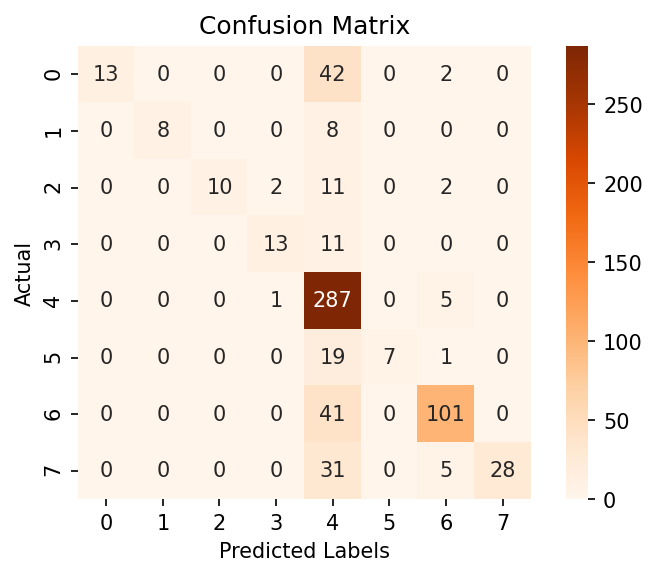

In [87]:
show_confusion_matrix(y_test,y_pred_tfidf1)

In [88]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train_tfidf1, y_train)

y_pred_tfidf1_nb = mnb.predict(X_test_tfidf1)

In [89]:
#Print the precision and recall, among other metrics
print(metrics.classification_report(y_test, y_pred_tfidf1_nb, digits=3))

              precision    recall  f1-score   support

           0      1.000     0.158     0.273        57
           1      1.000     0.500     0.667        16
           2      1.000     0.280     0.438        25
           3      0.917     0.458     0.611        24
           4      0.605     0.986     0.750       293
           5      1.000     0.148     0.258        27
           6      0.881     0.676     0.765       142
           7      1.000     0.328     0.494        64

    accuracy                          0.687       648
   macro avg      0.925     0.442     0.532       648
weighted avg      0.792     0.687     0.646       648



 # <a name= 'wordcloud'> Word Cloud </a>

In [96]:
from bidi.algorithm import get_display

In [ ]:
# Import package
import matplotlib.pyplot as plt
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

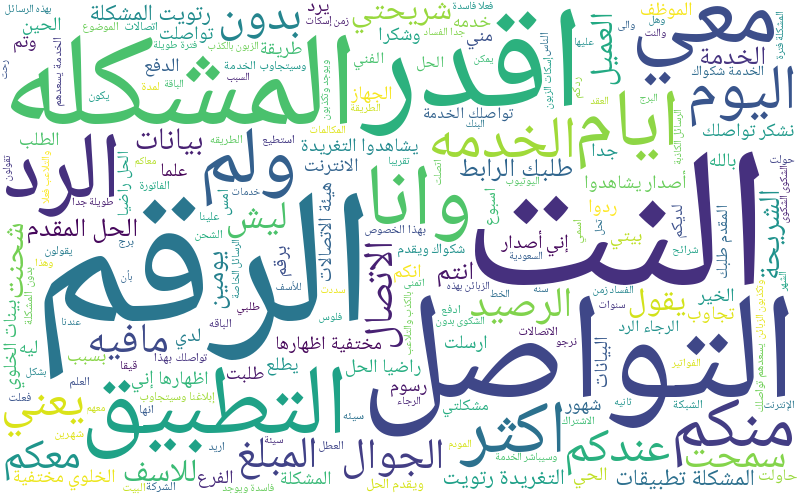

In [119]:
#1-Visualize the 100 most frequent words used in all the tweets using a Word cloud.

texts = ' '.join([txt for txt in df_final['Cleaned_Tweet']])
#te=removeWeirdChars(texts);
reshaped_text = arabic_reshaper.reshape(texts)
bidi_text = get_display(reshaped_text)
wordcloud = WordCloud(max_words=200,width=800, height=500, background_color="white",font_path='/Users/ahad/Documents/DATASETS/ArbFONTS-NotoNaskhArabic-Regular.ttf').generate(bidi_text)
wordcloud.to_file("/Users/ahad/Documents/DATASETS/logo.png")
mask = np.array(Image.open('/Users/ahad/Documents/DATASETS/logo.png'))
wordcloud.to_image()
